# Сборный проект 1 #

# Исследование продаж компьютерных игр #

# Описание проекта #

Интернет-магазин "Стримчик" продает компьютерные игры по всему миру.  Нам доступны данные из открытых источников о продаже игр, оценке пользователей и экспертов, жанры и платформы. Нам доступны данные за 2016год. Планируем рекламную кампанию на 2017год.

**Цель исследования:** выявить закономерности определяющие успешность игры, разработать рекомендацию для планирования рекламной кампании на 2017 г.

**Описание данных:**

Данные за 2016 год неполные (на данный момент декабрь 2016г).

Доступный датасет - /datasets/games.csv.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования:**
Исторические данные о продажах игр получим из файла games.csv. О качестве данных ничего неизвестно. Поэтому перед проведением анализа и проверкой гипотез понадобится обзор и предобработка данных. Обработаем пропуски, исправим названия и типы данных в столбцах, удалим дубликаты в данных.

**План работ:**
1. Изучаем общую информацию предоставленных данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

## Изучение общей информации ##

### Импорт библиотек ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from IPython.display import display
pd.set_option('display.max_columns',30)
pd.set_option('display.float_format', '{:.2f}'.format)

### Загружаем датасет ###

In [2]:
df = pd.read_csv('/datasets/games.csv')

### Выводим общую информацию ###

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод ###

В датасете 16715 строк, 11 столбцов. Нарушен стиль написания названий столбцов, есть пропуски и неправильный тип данных.


## Предобработка данных ##

### Приведем столбцы к нижнему регистру ###

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###  Поиск дубликатов ###

In [6]:
# посмотрим наличие дубликатов
df.duplicated().sum()

0

In [7]:
df.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df[df.duplicated(['name', 'platform', 'year_of_release'])].count()

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

In [9]:
df[df.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [10]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])

In [11]:
df[df.duplicated(['name', 'platform', 'year_of_release'])].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [12]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [13]:
df['name'].str.lower()

0                           wii sports
1                    super mario bros.
2                       mario kart wii
3                    wii sports resort
4             pokemon red/pokemon blue
                     ...              
16710    samurai warriors: sanada maru
16711                 lma manager 2007
16712          haitaka no psychedelica
16713                 spirits & spells
16714              winning post 8 2016
Name: name, Length: 16713, dtype: object

In [14]:
df['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
# проверим наличие пропусков 
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [16]:
#без названия игры и жанра нет смысла оставлять эти данные 
df = df.dropna(subset = ['name']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Обработка столбца year_of_release ####

In [19]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16370,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16402,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16445,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16455,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
'% пропусков данных', (df['year_of_release'].isnull().sum() / len(df['year_of_release'])*100).round(2)

('% пропусков данных', 1.61)

In [21]:
# удалим пропуски
df = df.dropna(subset = ['year_of_release']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Обработка столбцов critic_score, user_score ####

In [22]:
# так как пропуски в данных столбцах составляют более 40%, замена их на среднее или медиану исказит данные
# в столбце user_score есть данные tbd которые не описаны (информации об обозначении нет)
# все пропуски заменим на значение -1
df['critic_score'] = df['critic_score'].fillna(-10)
df['user_score'] = df['user_score'].fillna(-1)
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [24]:
# приведем оценку критиков к 10-й оценке
df['critic_score'] = df['critic_score'] / 10
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,7.60,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,-1.00,-1,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,8.20,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,8.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,-1.00,-1,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,8.90,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,5.80,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,8.70,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,-1.00,-1,NaN


#### Обработка столбца rating ####

In [25]:
# пропуски в столбце заменим на nd
df['rating'] = df['rating'].fillna('nd')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуем данные в нужные типы ###

In [26]:
# год выпуска игры указан с плавающей точкой - сделаем целочисленным
df['year_of_release'] = df['year_of_release'].astype(int)

In [27]:
# оценку пользователя приведем к типу числа с плавающей точкой
df['user_score'] = df['user_score'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Выведем в новый столбец суммарные продажи во всех регионах ###

In [29]:
df['global_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.60,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.20,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,nd,31.38


### Вывод ###

При работе с данными произвели:
1. привели названия столбцов к нижнему регистру
2. явные дубликаты не обнаружены
3. работа с пропусками и типом данных:
- удалили пропуски в столбцах name, genre, year_of_release
- заменили пропуски на значение -1 и -10 в столбцах user_score и critic_score соответственно
- заменили неизвестную оценку tbd в user_score на -1
- заменили пропуски в rating на nd
- изменили типы данных в столбце year_of_release на int, user_score на  float.
4. Посчитали суммарные продажи игр во всех регионах и вывели данные в общий стобец global_sales.


## Исследовательский анализ данных ##

### Оценим выпуск игр по годам ###

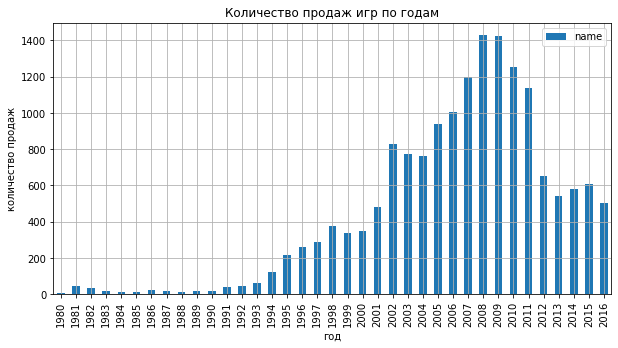

In [30]:
(
    df.query('year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(kind = 'bar', figsize = (10, 5), grid = True)
)
plt.title('Количество продаж игр по годам')
plt.xlabel('год')
plt.ylabel('количество продаж')
plt.show()

In [31]:
df['year_of_release'].describe()

count   16443.00
mean     2006.49
std         5.88
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2016.00
Name: year_of_release, dtype: float64

*Вывод*

В данных присутствуют игры с 1980 по 2016 год. До 94 года релиз составлял не более 150 игр в год. Далее начинается рост выпуска игр - связано с большей доступностью игровых платформ и PC. Уверенный рост релиза начинается с 2005 года, а пик приходится на 2007 и 2008 года. Для анализа лучше взять период не более 10 лет, т.к. последняя четверть данных показывает незначительный спад интереса к компьютерным играм (возможно это связано с переводом интереса пользователя на мобильные игры).

### Изменение продаж игр по платформам ###

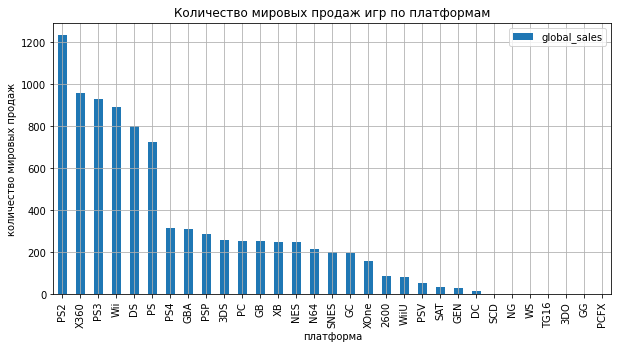

In [32]:
# изменение продаж по платформам
(
    df.pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum')
    .sort_values(by = 'global_sales', ascending = False)
    .plot(kind = 'bar', figsize = (10, 5), grid = True)
)
plt.title('Количество мировых продаж игр по платформам')
plt.xlabel('платформа')
plt.ylabel('количество мировых продаж')
plt.show()

Наибольшие продажи игр пришлись на 6 платформ. 

In [33]:
# выберем платформы с наибольшими продажами
top = df.pivot_table(index='platform', values='global_sales',\
                     aggfunc='sum').sort_values(by='global_sales', ascending=False).reset_index()
top = top.loc[0:5, 'platform':'global_sales']
top.head(6)

,platform,global_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


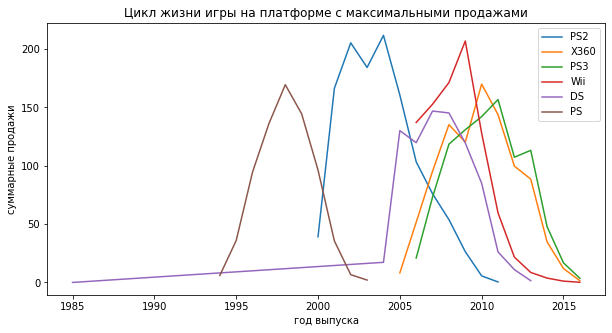

In [34]:
# распределение по годам продаж на выбранных 6 платформах
for i in top['platform']:
    (
    df.query('platform == @i')
    .pivot_table(index = 'year_of_release', values = 'global_sales', aggfunc ='sum')
    .sort_values('year_of_release', ascending = False)['global_sales']
    .plot(kind = 'line', figsize = (10, 5), label = i)
    )
    plt.title('Цикл жизни игры на платформе с максимальными продажами')
    plt.xlabel('год выпуска')
    plt.ylabel('суммарные продажи')
    plt.legend()

In [35]:
df.pivot_table(index = 'platform', values = 'year_of_release')    

,year_of_release
platform,
2600,1982.14
3DO,1994.67
3DS,2013.13
DC,1999.94
DS,2008.19
GB,1995.96
GBA,2003.21
GC,2003.40
GEN,1993.04


In [36]:
df_ds = df.query('platform == "DS" and year_of_release<=1990')
df_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,-1.00,-1.00,nd,0.02


In [37]:
df = df.drop (index= 15704)

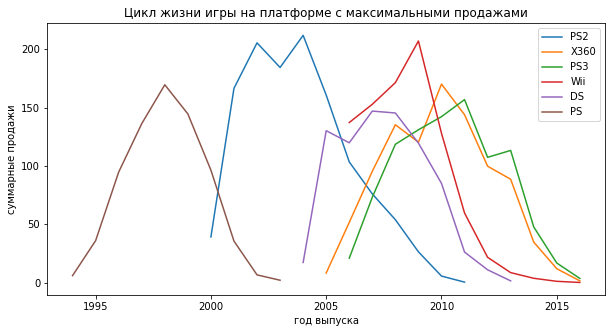

In [38]:
for i in top['platform']:
    (
    df.query('platform == @i')
    .pivot_table(index = 'year_of_release', values = 'global_sales', aggfunc ='sum')
    .sort_values('year_of_release', ascending = False)['global_sales']
    .plot(kind = 'line', figsize = (10, 5), label = i)
    )
    plt.title('Цикл жизни игры на платформе с максимальными продажами')
    plt.xlabel('год выпуска')
    plt.ylabel('суммарные продажи')
    plt.legend()

In [39]:
# рассчитает жизненный цикл игровых платформ
life_platform = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max']).reset_index()
life_platform['life'] =life_platform['max'] - life_platform['min'] + 1
life_platform

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,10
1,3DO,1994,1995,2
2,3DS,2011,2016,6
3,DC,1998,2008,11
4,DS,2004,2013,10
5,GB,1988,2001,14
6,GBA,2000,2007,8
7,GC,2001,2007,7
8,GEN,1990,1994,5


In [40]:
life_platform['life'].describe()

count   31.00
mean     8.00
std      5.90
min      1.00
25%      4.00
50%      7.00
75%     11.00
max     32.00
Name: life, dtype: float64

In [41]:
life_platform[life_platform['life'] == 32]

,platform,min,max,life
,,year_of_release,year_of_release,
13,PC,1985,2016,32


*Вывод*

Среднее время жизни платформы составляет 7 лет (медианное 8,6). Графики топ платформ  показывают, что примерное время жизни платформы около 10 лет. Т.к. больший интерес представляет рост продаж игр на платформе то определим интересующий нас период в 4 года (с 2013 по 2016года).

### Оценим перспективность платформ ###

In [42]:
# посмотрим какие платформы имели продажи после 2013 года
promising_platforms = (df
    .query('year_of_release >= 2013')
    .pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum')
    .sort_values(by = 'global_sales', ascending = False)
    .reset_index().head(30)['platform'].tolist()
    )                         
promising_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

In [43]:
# создадим новый DF с данными по столбцу год релиза с 2013 
df_new = df.query('year_of_release >= 2013').reset_index(drop = True)
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,nd,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01


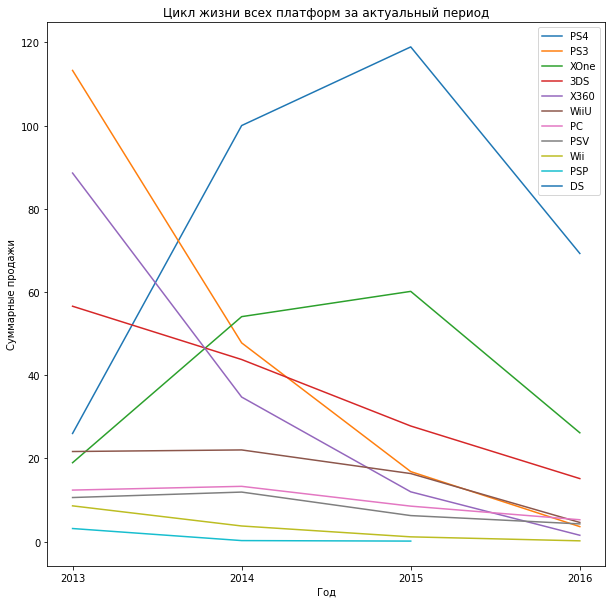

In [44]:
for i in promising_platforms:
    (
    df_new.query('platform == @i')
    .pivot_table(index = 'year_of_release', values = 'global_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['global_sales']
    .plot(kind='line', figsize = (10, 10), label=i)
    )
    plt.title('Цикл жизни всех платформ за актуальный период')
    plt.xticks(np.arange(2013, 2017, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

*Вывод*

График показывает снижение продаж по всем платформам, и отсутствие на рынке новых игроков.
PS4, XOne и 3DS имеют тенденцию к убыванию продаж, но находятся в более выигрышном положении чем остальные.
X360 и PS3 показывают снижение выручки с 2013 года
Группа платформ PC, WiiU, PSV не показывает роста продаж, но в течении периода 2013-2016г платформы имеют снижающиеся, но стабильные продажи.

### Оценим продажи игр по платформам ###

In [45]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,nd,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01


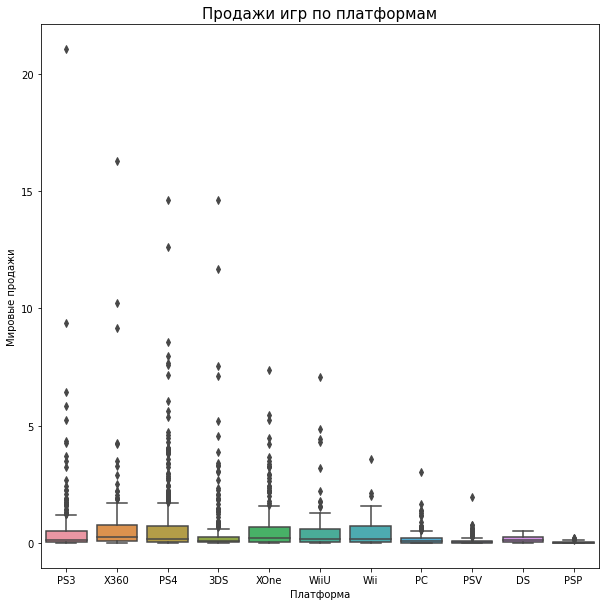

In [46]:
# построим boxplot по мировым продажам по каждой платформе
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_new, x = 'platform', y = 'global_sales')
plt.title('Продажи игр по платформам', fontsize = 15)
plt.xlabel('Платформа', fontsize = 10)
plt.ylabel('Мировые продажи', fontsize = 10);

In [47]:
# посмотрим числовое описание данных столбца мировых продаж
df_new['global_sales'].describe()

count   2233.00
mean       0.49
std        1.24
min        0.01
25%        0.03
50%        0.11
75%        0.40
max       21.05
Name: global_sales, dtype: float64

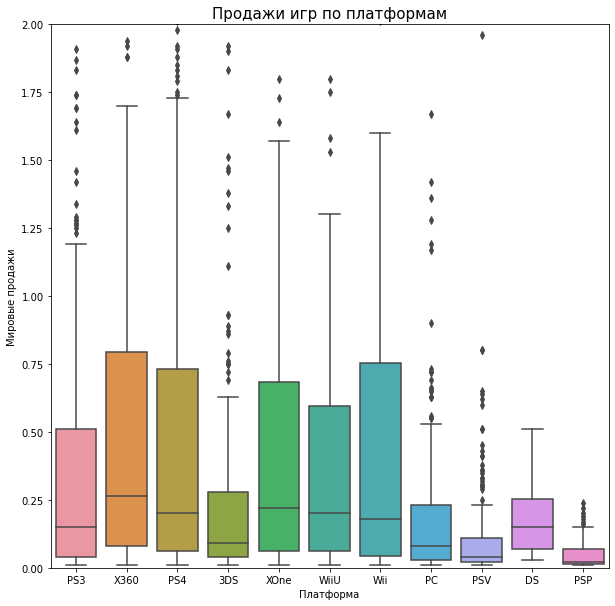

In [48]:
# изменим масштаб из-за многочисленных выбросов
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_new, x = 'platform', y = 'global_sales')
plt.ylim(0, 2)
plt.title('Продажи игр по платформам', fontsize = 15)
plt.xlabel('Платформа', fontsize = 10)
plt.ylabel('Мировые продажи', fontsize = 10);

*Вывод*

Медианное значение суммарных мировых продаж значительно отличается в большую сторону от платформенных значений. Есть и выбросы по платформам, которых много и это говорит о наличии у каждой платформы игр которые приносили хорошую прибыль.

### Влияние отзывов на продажи игр одной популярной платформы ###

In [49]:
# посмотрим сводную таблицу продаж по платформам
sales_leader = df_new.pivot_table(index = 'platform', values = 'global_sales', aggfunc = 'sum')\
.sort_values(by = 'global_sales', ascending = False).reset_index()              

In [50]:
sales_leader.head()

,platform,global_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


In [51]:
df_ps = df_new.query('platform == "PS4" and critic_score>-1 and user_score>-1')

In [52]:
df_ps

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.20,4.30,E,8.58
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,8.30,5.70,M,7.66
12,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,8.50,5.00,E,7.60
15,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,8.70,6.50,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2158,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,4.20,2.30,E10+,0.01
2162,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,7.00,6.80,T,0.01
2163,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,6.90,7.50,nd,0.01
2173,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,6.10,7.90,T,0.01


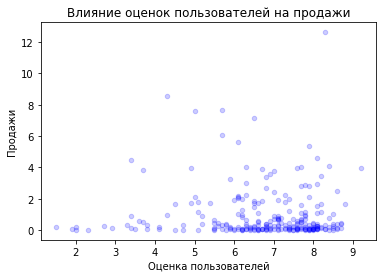

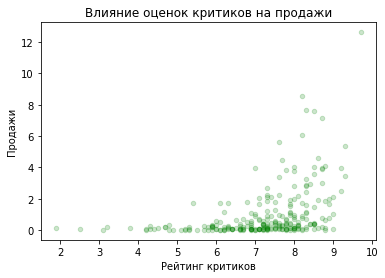

In [53]:
# построим диаграмму рассеяния 
df_ps.plot.scatter(x = 'user_score',  y = 'global_sales', alpha=0.2, color = 'b')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на продажи')
plt.show()
df_ps.plot.scatter(x = 'critic_score', y = 'global_sales', alpha=0.2, color = 'g')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на продажи')
plt.show()

In [54]:
'Корреляция между оценкой пользователей и продажами:', df_ps['user_score'].corr(df_ps['global_sales']).round(3)

('Корреляция между оценкой пользователей и продажами:', -0.034)

In [55]:
'Корреляция между оценкой критиков и продажами:', df_ps['critic_score'].corr(df_ps['global_sales']).round(3)

('Корреляция между оценкой критиков и продажами:', 0.406)

Распределение показало увеличение продаж от оценок не является линейным. При высоких оценках не выявлено прямой зависимости увеличения продаж, что подтверждается рассчетом корреляции (значения близкие к 0 - 0,034 и 0,406).

Посчитаем корреляцию и построим диаграмму рассеяния для общих данных

In [56]:
'Корреляция между оценками пользователей и продажами: ', df_new.query('user_score > -1')['user_score'].corr(df_new['global_sales']).round(3)

('Корреляция между оценками пользователей и продажами: ', -0.003)

In [57]:
'Корреляция между оценками критиков и продажами: ', df_new.query('critic_score > -1')['critic_score'].corr(df_new['global_sales']).round(3)

('Корреляция между оценками критиков и продажами: ', 0.314)

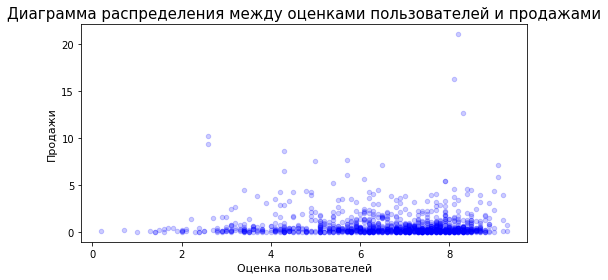

In [58]:
df_new.query('user_score > -1').plot(x = 'user_score', y = 'global_sales', kind = 'scatter', figsize = (8, 4), alpha = 0.2, color = 'b')
plt.title('Диаграмма распределения между оценками пользователей и продажами', fontsize = 15)
plt.xlabel('Оценка пользователей', fontsize = 11)
plt.ylabel('Продажи', fontsize = 11)
plt.show()

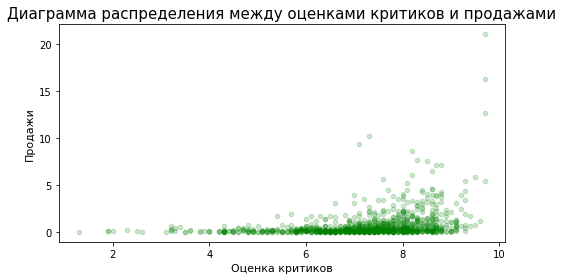

In [59]:
df_new.query('critic_score > -1').plot(x = 'critic_score', y = 'global_sales'\
                                       , kind = 'scatter', figsize = (8, 4), alpha = 0.2, color = 'g')
plt.title('Диаграмма распределения между оценками критиков и продажами', fontsize = 15)
plt.xlabel('Оценка критиков', fontsize = 11)
plt.ylabel('Продажи', fontsize = 11)
plt.show()

*Вывод*

Построенные диаграммы рассеяния и расчитаная корреляция как для "лидирующей" платформы PS4 так и для суммарных данных указывают на низкое влияние оценок пользователей и критиков на продажи игр (хотя мнение критиков 0.314 немного больше влияет на интерес пользователя (-0.003) к новинкам на платформах).

### Соотнесем выводы из предыдущего раздела исседования с продажами игр на других платформах ###

Корреляция дает право считать что мнение критиков влияет на покупательскую способность больше, чем мнение пользователей.
Посчитаем корреляцию для платформ из DF sales_leader (PS3, XOne, 3DS, X360) к оценке критиков.

In [60]:
df_PS3 = df_new.query('platform == "PS3"')
'Корреляция между оценками пользователей и продажами на платформе PS3:',\
df_PS3.query('critic_score > -1')['critic_score'].corr(df_PS3['global_sales']).round(3)

('Корреляция между оценками пользователей и продажами на платформе PS3:',
 0.334)

In [61]:
df_XOne = df_new.query('platform == "XOne"')
'Корреляция между оценками пользователей и продажами на платформе XOne: ',\
df_XOne.query('critic_score > -1')['critic_score'].corr(df_XOne['global_sales']).round(3)

('Корреляция между оценками пользователей и продажами на платформе XOne: ',
 0.417)

In [62]:
df_3DS = df_new.query('platform == "3DS"')
'Корреляция между оценками пользователей и продажами на платформе 3DS: ',\
df_3DS.query('critic_score > -1')['critic_score'].corr(df_3DS['global_sales']).round(3)

('Корреляция между оценками пользователей и продажами на платформе 3DS: ',
 0.357)

In [63]:
df_X360 = df_new.query('platform == "X360"')
'Корреляция между оценками пользователей и продажами на платформе X360: ',\
df_X360.query('critic_score > -1')['critic_score'].corr(df_X360['global_sales']).round(3)

('Корреляция между оценками пользователей и продажами на платформе X360: ',
 0.35)

*Вывод*

Корреляции между оценкой критиков и продажами игр по разным платформам показывают на очень умеренную зависимость 0,334 - 0,417.

### Посмотрим общее распределение игр по жанрам ###

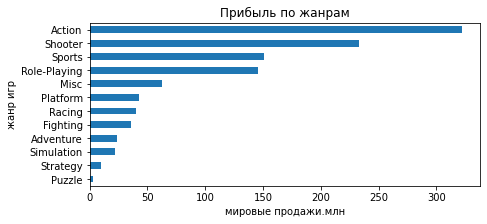

In [64]:
#построим график продаж игр по жанрам за период с 2013г по 2016г включительно
df_new.pivot_table(index = 'genre', values = 'global_sales', aggfunc ='sum').sort_values('global_sales', ascending = True)\
.plot(kind = 'barh', figsize = (7, 3), y = 'global_sales', legend = False)
plt.title('Прибыль по жанрам')
plt.ylabel('жанр игр')
plt.xlabel('мировые продажи.млн')
plt.show()

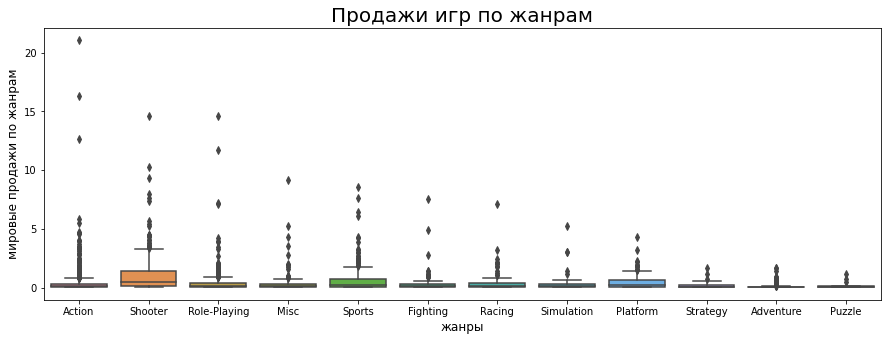

In [65]:
# построим boxplot мировых продаж по жанрам
plt.figure(figsize = (15, 5))
sns.boxplot(data = df_new, x = 'genre', y = 'global_sales')
plt.title('Продажи игр по жанрам', fontsize = 20)
plt.xlabel('жанры', fontsize = 12)
plt.ylabel('мировые продажи по жанрам', fontsize = 12);

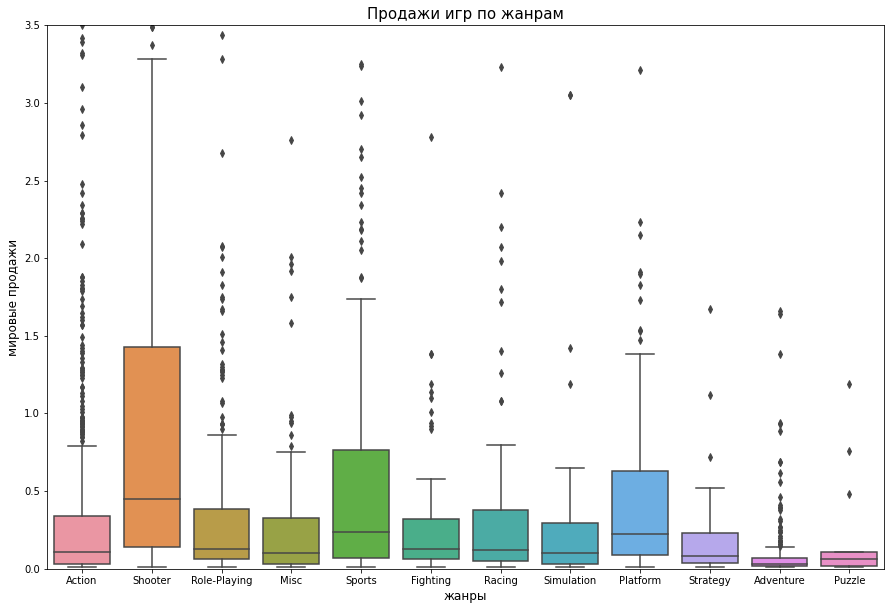

In [66]:
#изменим масштаб из-за многочисленных выбросов
plt.figure(figsize = (15,10))
sns.boxplot(data = df_new, x = 'genre', y = 'global_sales')
plt.ylim(0, 3.5)
plt.title('Продажи игр по жанрам', fontsize = 15)
plt.xlabel('жанры', fontsize = 12)
plt.ylabel('мировые продажи', fontsize = 12);

In [67]:
df_new.pivot_table(index = 'genre', values = 'global_sales', aggfunc = ['sum', 'median', 'count'])

,sum,median,count
,global_sales,global_sales,global_sales
genre,,,
Action,321.87,0.11,766
Adventure,23.64,0.03,245
Fighting,35.31,0.12,80
Misc,62.82,0.10,155
Platform,42.63,0.22,74
Puzzle,3.17,0.06,17
Racing,39.89,0.12,85
Role-Playing,145.89,0.12,292


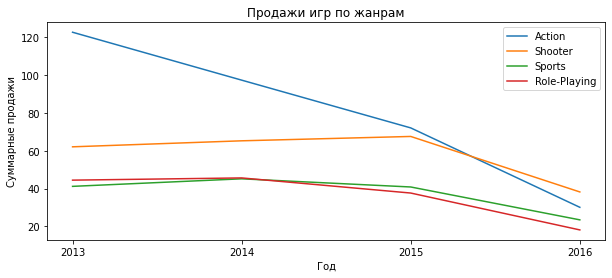

In [68]:
for i in ['Action', 'Shooter', 'Sports', 'Role-Playing']:
    df_new.query('genre == @i').pivot_table(index = 'year_of_release', values = 'global_sales', aggfunc = 'sum')\
    .sort_values('year_of_release', ascending = False)['global_sales'].plot(kind='line', figsize = (10, 4), label=i)
    plt.title('Продажи игр по жанрам')
    plt.xticks(np.arange(2013, 2017, step = 1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend() 

*Вывод*

Лидером по продажам (321,87млн) и количеству игр (766) является жанр Action. Вторым по продажам является жанр Shooter (232.98млн), хотя по количеству игр находится на 5 месте. Медианные значения показали что лучше пользуется спросом жанры Shooter и Sport.

### Общий вывод ###

При исследовательском анализе данных определили
 1. Средний срок жизни платформы примерно 10 лет. Для анализа лучше взять первую половину цикла жизни платформы (4-5 лет), когда идет рост продаж.
 2. За последнии 3 года предоставленных данных (2013-2016год включительно)нет роста в продажах на представленных платформах и что самое главное нет новых платформ.
 3. Даже лидеры рынка по объему продаж на 2016 год PS4 и XOne имеют тенденцию к снижению продаж.
 4. На примере одной платформы PS4 посмотрели влияние оценки пользователей и критиков на продажу игр - результат - связи не линейные и не зависимы. Оценки критиков незначительно превышают оценки пользователей, хотя последних на 20 % больше в данных.
 5. Самые прибыльные жанры Action и Shooter (321.87 и 232,98 млн соответственно), но игр в первом жанре в 4.5 раза больше.

Предпочтение лучше отдать жанру Shooter, что подтверждается большим медианным значением (в разы больше других жанров).



## Составим портрет пользователя каждого региона na, eu, jp ## 

### Топ 5 популярных платформ в каждом регионе ###

In [69]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,nd,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01


In [70]:
# оформим таблицу na_sales региона для 5 первых по продажам платформ
narp = df_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
.sort_values('na_sales', ascending = False).reset_index()
narp.loc[5:, 'platform'] = 'other'
narp = narp.groupby('platform')['na_sales'].sum()
narp

platform
3DS      38.20
PS3      63.50
PS4     108.74
X360     81.66
XOne     93.12
other    52.49
Name: na_sales, dtype: float64

In [71]:
# построим таблицу eu_sales региона для 5 первых по продажам платформ и груговую диаграмму для европейского региона
eurp = df_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
.sort_values('eu_sales', ascending = False).reset_index()
eurp.loc[5:, 'platform'] = 'other'
eurp = eurp.groupby('platform')['eu_sales'].sum()
eurp

platform
3DS      30.96
PS3      67.81
PS4     141.09
X360     42.52
XOne     51.59
other    58.26
Name: eu_sales, dtype: float64

In [72]:
# построим таблицу jp_sales региона для 5 первых по продажам платформ и круговую диаграмму для японского региона
jprp = df_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
.sort_values('jp_sales', ascending = False).reset_index()
jprp.loc[5:, 'platform'] = 'other'
jprp = jprp.groupby('platform')['jp_sales'].sum()
jprp

platform
3DS     67.81
PS3     23.35
PS4     15.96
PSV     18.59
WiiU    10.88
other    4.19
Name: jp_sales, dtype: float64

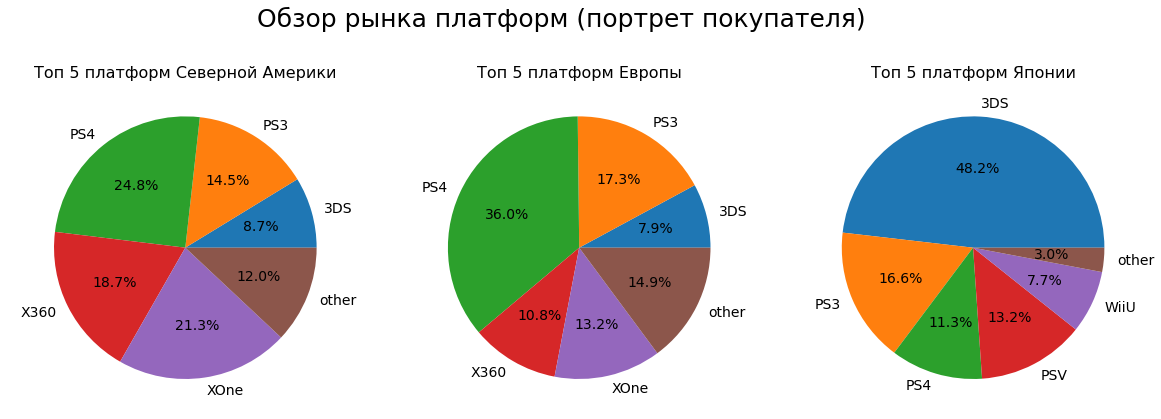

In [73]:
ax1 = plt.subplot(1, 3, 1)
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=25)
narp.plot(kind = 'pie', y = 'na_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Топ 5 платформ Северной Америки', fontsize=16)
ax2 = plt.subplot(1, 3, 2)
eurp.plot(kind = 'pie', y = 'eu_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Топ 5 платформ Европы', fontsize=16)
ax3 = plt.subplot(1, 3, 3)
jprp.plot(kind = 'pie',  y = 'jp_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Топ 5 платформ Японии', fontsize=16)
plt.show()

*Вывод*

Круговые диаграммы показали схожесть в использовании видов платформ в североамериканском и европейском регионах. В лидерах PS4 (24.8 и 36% соответственно). 2 и 3 места поделили X360 и PS3 в северной америке, PS3 и X360 в европейком регионе. В jp регионе мобильным платформам японских производителей принадлежит 48.2% платформе нинтендо 3DS и 28% PS.

### Топ 5 популярных жанров в каждом регионе ###

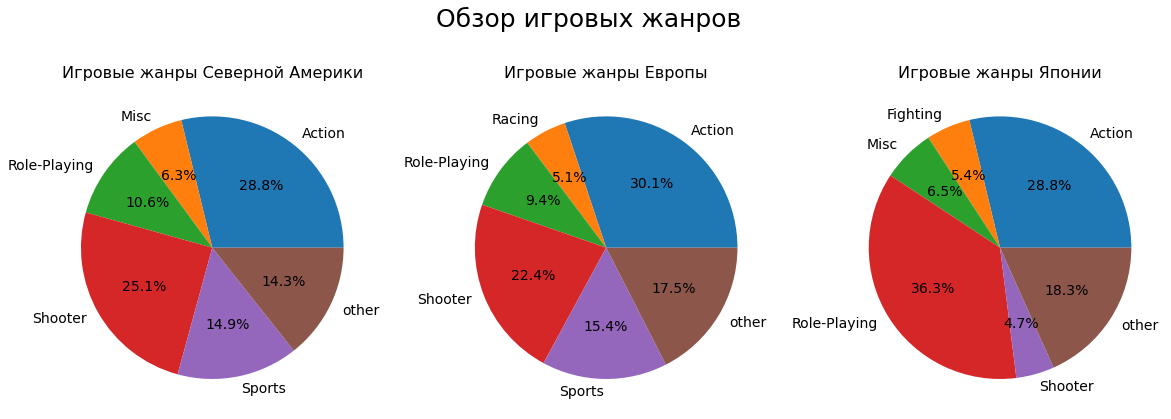

In [74]:
# построим диаграммы для популярных жанров указанных регионов
narg = df_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
.sort_values('na_sales', ascending = False).reset_index()
narg.loc[5:, 'genre'] = 'other'
narg = narg.groupby('genre')['na_sales'].sum()

eurg = df_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
.sort_values('eu_sales', ascending = False).reset_index()
eurg.loc[5:, 'genre'] = 'other'
eurg = eurg.groupby('genre')['eu_sales'].sum()

jprg = df_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
.sort_values('jp_sales', ascending = False).reset_index()
jprg.loc[5:, 'genre'] = 'other'
jprg = jprg.groupby('genre')['jp_sales'].sum()

ax1 = plt.subplot(1, 3, 1)
plt.suptitle('Обзор игровых жанров', fontsize=25)
narg.plot(kind = 'pie', y = 'genre', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Игровые жанры Северной Америки', fontsize=16)
ax2 = plt.subplot(1, 3, 2)
eurg.plot(kind = 'pie', y = 'genre', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Игровые жанры Европы', fontsize=16)
ax3 = plt.subplot(1, 3, 3)
jprg.plot(kind = 'pie',  y = 'genre', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Игровые жанры Японии', fontsize=16)
plt.show()

*Вывод*

В Северной Америке и Европе больший интерес вызывают Action, Shooter, Sport (в порядке убывания % продаж). Замыкает 5 лидеров в NA-регионе командный шутер (6,3%), в EU-регионе Racing (5,1%). В Японии Action (28,8%) уступают лидерство ролевым играм (36,3%), а Shooter всего на 5 месте (4.7%).

### Влияние рейтингов ERSB на продажи в регионах ###

In [75]:
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.70,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.70,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.00,-1.00,nd,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.00,-1.00,nd,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.70,8.30,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,nd,0.01


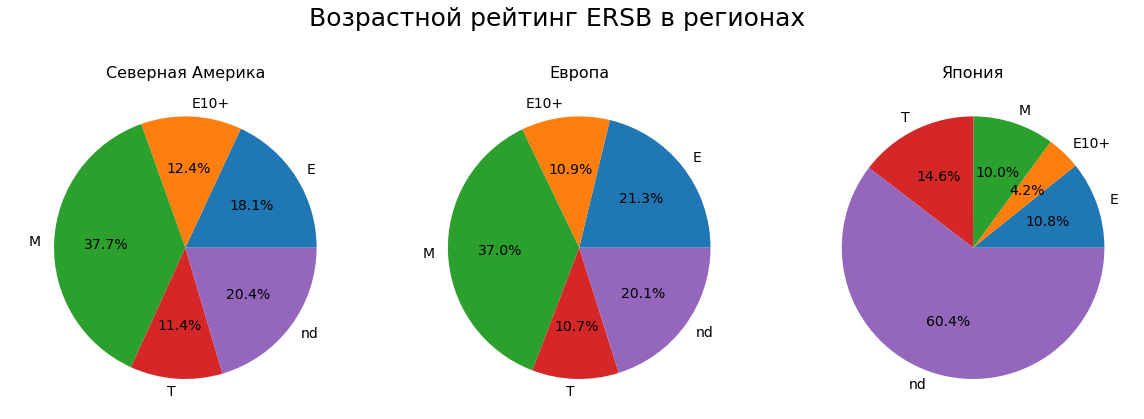

In [76]:
narr = df_new.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')\
.sort_values('na_sales', ascending = False).reset_index()
narr = narr.groupby('rating')['na_sales'].sum()
eurr = df_new.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')\
.sort_values('eu_sales', ascending = False).reset_index()
eurr = eurr.groupby('rating')['eu_sales'].sum()
jprr = df_new.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')\
.sort_values('jp_sales', ascending = False).reset_index()
jprr = jprr.groupby('rating')['jp_sales'].sum()
ax1 = plt.subplot(1, 3, 1)
plt.suptitle('Возрастной рейтинг ERSB в регионах ', fontsize=25)
narr.plot(kind = 'pie', y = 'na_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Северная Америка', fontsize=16)
ax2 = plt.subplot(1, 3, 2)
eurr.plot(kind = 'pie', y = 'eu_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Европа', fontsize=16)
ax3 = plt.subplot(1, 3, 3)
jprr.plot(kind = 'pie',  y = 'jp_sales', autopct = '%1.1f%%', figsize = (20, 7), legend=False, fontsize=14)\
.set(ylabel = ' ')
plt.title('Япония', fontsize=16)
plt.show()

*Вывод*

Североамериканский и европейский регионы схожи по распределению категорий игр: на первом месте игры для людей старше 17 лет (37%), 2 и 3 место занимает категория игр для всех возрастов и категория в которой не указаны данные (примерно 20%+-1%). Игры с рейтингом Т и Е+10 имеют по 11-12% доля рынка.
Рейтинг ESRB используется в первых 2-х регионах, поэтому на диаграмме японского региона 60% данных без опознавания категории игр (может игры внутреннего рынка не получили рейтинг и имеют распространение только внутри региона). Из оставшихся игр категория старше 13 лет (Т) занимает почти 15%, М и Е категории имеют по 10% рынка. 

### Вывод ###

Портрет пользователя схож для североамериканского и европейского региона. Предпочтение отдается играм категории выше 17 лет и для всех возрастов, в жанрах Action, Shooter, Sport, на платформах PS4, PS3, X360.
Японский пользователь старше 13 лет и категории Е предпочитает играть в ролевые игры (36%) и экшены (28) на мобильных платформах нинтендо  и PS.

## Проверим гипотезы ##

### Средние пользовательские рейтинги платформ XOne и PC одинаковые ###

In [77]:
# сделаем срез по интересующим платформам
xone = df_new.query('platform == "XOne" and user_score > -1')
xone = xone['user_score']
xone.describe()

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

In [78]:
pc = df_new.query('platform == "PC" and user_score > -1')
pc = pc['user_score']
pc.describe()

count   155.00
mean      6.27
std       1.74
min       1.40
25%       5.30
50%       6.80
75%       7.60
max       9.30
Name: user_score, dtype: float64

In [79]:
# определим дисперсию выборок
np.var(xone), np.var(pc)

(1.8965188383045526, 3.016306347554631)

In [80]:
# имеем 2 выборки данных для проверки гипотезы используем метод st.ttest_ind,
# .т.к. отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1.
# H0: средние пользовательские рейтинги платформ XOne и PC равны, 
# H1: средние пользовательские рейтинги платформ XOne и PC не равны 
# пороговое значение статистической значимости определим в 5%
alpha = 0.05
results = st.ttest_ind(xone, pc, alternative = 'two-sided')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


*Вывод*

При установленном уровне статистической значимости в 5% не удалось отвергнуть нулевую гипотезу - следовательно пользовательские рейтинги платформ XOne и PC примерно одинаковы. 

In [81]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports  разные ###

In [82]:
# сделаем срез по интересующим платформам
action = df_new.query('genre == "Action" and user_score > -1')
action = action['user_score']
sports = df_new.query('genre == "Sports" and user_score > -1')
sports = sports['user_score']

In [83]:
action.describe()

count   389.00
mean      6.84
std       1.33
min       2.00
25%       6.30
50%       7.10
75%       7.80
max       9.10
Name: user_score, dtype: float64

In [84]:
sports.describe()

count   160.00
mean      5.24
std       1.78
min       0.20
25%       4.10
50%       5.50
75%       6.50
max       8.80
Name: user_score, dtype: float64

In [85]:
np.var(action),np.var(sports)

(1.7648124186332366, 3.160733984375)

In [86]:
# имеем 2 выборки данных для проверки гипотезы используем метод st.ttest_ind
# H0: средние пользовательские рейтинги жанров Action и Sports равны, 
# H1: средние пользовательские рейтинги платформ Action и Sports не равны -если отвергается H0, то подтверждается H1
# пороговое значение статистической значимости определим в 5%
alpha = 0.05
results = st.ttest_ind(action, sports, alternative = 'two-sided')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


*Вывод*

Нулевая гипотеза отвергнута,  рейтинги жанров Action и Sports не равны, а значит разные, при установленном уровне значимости в 5% 

### Вывод ###

Исходные данные имеют нормальные значения для проведения проверки гипотез:
1. данные превышают необходимые 30 значений, чтобы проводить анализ (более 150 значений в каждой группе)
2. значения из независимых групп
3. средние имеют нормальное распределение
Определили дисперсию средних значений - удовлетворяет требованию соотношения большей к меньшей - меньше чем 4:1. Делаем вывод что дисперсии данных групп равны. Поэтому применим к проверки гипотез тест st.ttest_ind.
Уровень значимости обычно устанавливают в пределах 1-10%. Выбираем значение в 5%.
Заданы вопросы равенства и неравенства средних в данных, поэтому проверяем двухстороннюю гипотезу (alternative = two_sided)

Построив модель анализа гипотезы находим значение p-value (определяет силу гипотезы) и сравниваем его с установленным пороговым значением статистической значимости (alpha=0,05).
Для гипотезы равенства средних показателей пользовательского рейтинга платформ XOne и PC получили подтверждение правильности этой гипотезы, и для второй гипотезы получили подтверждение правильности ее (вопрос был про разность средних показателей пользовательского рейтинга игровых жанров). 


## Общий вывод ##

### Краткий обзор проведенной работы ###

1. Изучили общую информацию
    - нарушен стиль написания названий столбцов
    - имеются пропуски в данных
    - требуестся изменение типов данных в некоторых столбцах
2. Предобработка данных
    - привели стиль написания столбцов к нижнему регистру
    - явных дубликатов не обнаружили
    - удалили пропуски в столбцах name, year_of_release
    - заменили пропуски в столбцах critic_score, user_score, rating
    - изменили типы данных в year_of_release, user_score
    - рассчитали суммарные продажи всех регионов из датафрейма
3. Провели исследовательский анализ данных
4. Составили портрет пользователя для каждого региона
5. Проверили гипотезы

### Главные выводы ###

Мы исследовали данные из открытых источников о продажах игр, рейтингах критиков и пользователей, жанрах и игровых платформах.
В последнии 4 года наблюдается спад в продажа игр даже на лидирующих по использованию платформах PS4 (PS3) и XOne. 
Средний цикл жизни игровой платформы определили 7-10 лет (рост 3-5 лет и снижение продаж).
С 2013г на рынке нет новых игровых платформ. 
Мнение критиков на продажи влияет больше чем отзыв пользователя(не смотря на то что  последних на 20 % больше).

Самыми прибыльными жанрами являются Action, Shooter (321,87 и 232,98 млн соответственно), они же и самые популярные в NA и EU регионах по рейтингу ESRB для всех возрастов и старше 17 лет, где пользователь играет на PS4 или XOne.

В JP регионе предпочитают играть в ролевые игры (1 место в рейтинге -36,3%), на 2 месте - Action 28,2%. Самой востребованной платформой в регионе  является нинтендо и PS. Исследованию возраста пользователя JP региона мешает отсутствие данных (60%). Из оставшихся 40% три группы с примерно равными долями в 10, 10 и 14% относятся к возрасту 17, все возрасты и 13лет.

Подтвердились гипотезы:
1. средние пользовательские рейтинги платформ XOne и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные



Самые прибыльные жанры Action и Shooter (321.87 и 232,98 млн соответственно), но игр в первом жанре в 4.5 раза больше.
Предпочтение лучше отдать жанру Shooter, что подтверждается большим медианным значением (в разы больше других жанров).


Построив модель анализа гипотезы находим значение p-value (определяет силу гипотезы) и сравниваем его с установленным пороговым значением статистической значимости (alpha=0,05). Для гипотезы равенства средних показателей пользовательского рейтинга платформ XOne и PC получили подтверждение правильности этой гипотезы, и для второй гипотезы получили подтверждение правильности ее (вопрос был про разность средних показателей пользовательского рейтинга игровых жанров).

### Рекомендация ###

Руководству интернет магазина "Стримчик" необходимо с помощью рекламных компаний развивать направление Shooter для возрастной категории старше 17 лет в европейском и североамериканском регионе на платформах PS4 b XOne,  для японского региона необходимо развивать жанр ролевых игр в которые играют все возрастные группы на платформах 3DS и PS4.  